# **1. Import Library**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [30]:
df = pd.read_csv('/content/sample_data/Dataset_clustering.csv')

In [31]:
# Memastikan dataset berhasil diload
print(df.head())

  Customer_Type  Unit_Price  Quantity  Discount  Total_Price  Cluster
0           B2B     1.66000        53   0.10000     79.18000        1
1           B2B     1.56000        90   0.10000    126.36000        1
2           B2B     1.17000        73   0.05000     81.14000        1
3           B2B     3.22000        59   0.10000    170.98000        1
4           B2B     0.87000        35   0.10000     27.40000        1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [32]:
# Memisahkan fitur dan target
X = df.drop(columns='Cluster')
y = df['Cluster']

In [33]:
# Split data menjadi train dan test dengan rasion (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Print jumlah masing-masing jumlah data
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 16000
Jumlah data testing: 4000


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Dengan mempertimbangkan berbagai algoritma klasifikasi yang sudah dipelajari pada kelas Hi, Machine Learning maka saya memilih untuk menguji performa untuk memperoleh perbandingan hasil antara algoritma decision tree dan random forest yang keduanya termasuk dalam kategori *tree-based algorithms*. Maka langkah selanjutnya adalah melatih model menggunakan data latih.

In [35]:
# Membuat transformer untuk kolom kategorikal
preprocessor = ColumnTransformer([
    ('encoder', TargetEncoder(), ['Customer_Type'])  # Menggunakan Target Encoding untuk kolom kategorikal
], remainder='passthrough')  # Kolom numerik akan dilewatkan tanpa perubahan

In [36]:
# === Decision Tree Algorithm ===
# Membuat pipeline untuk Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [37]:
# Melatih model
dt_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', TargetEncoder(),
                                                  ['Customer_Type'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [38]:
# === Random Forest Algorithm ===
# Membuat pipeline untuk Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [39]:
# Melatih model
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', TargetEncoder(),
                                                  ['Customer_Type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Narasi dari algoritma yang digunakan :**
- Decision Tree adalah algoritma machine learning yang sering digunakan dalam tugas klasifikasi dan regresi. Struktur dari algoritma ini mirip dengan bentuk pohon dengan setiap cabang mewakili keputusan atau percabangan dari data berdasarkan fitur-fitur yang ada. Struktur dasar dari Decision Tree melibatkan tiga komponen utama, yaitu akar (root node), node (decision node), dan daun (leaf node). Root node mewakili seluruh dataset dan menjadi titik awal untuk pemisahan data. Node-node di sepanjang cabang pohon mewakili keputusan yang diambil berdasarkan fitur tertentu, sedangkan leaf node adalah hasil akhir dari proses klasifikasi atau regresi, seperti label kelas atau nilai numerik.
- Random Forest adalah algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting. Setiap pohon dalam Random Forest dilatih menggunakan subset acak dari data pelatihan dan subset acak dari fitur yang tersedia. Hasil akhir prediksi ditentukan melalui voting (untuk klasifikasi) atau rata-rata (untuk regresi) dari hasil semua pohon dalam model. Tujuan utama Random Forest adalah mengatasi kelemahan Decision Tree yang cenderung overfit terhadap data pelatihan. Dengan menggabungkan prediksi dari banyak pohon, Random Forest mampu menghasilkan model yang lebih stabil, akurat, dan lebih general terhadap data baru.


## **b. Evaluasi Model Klasifikasi**

In [40]:
# Evaluasi model decision tree
y_pred_dt = dt_pipeline.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      1376
           2       1.00      0.98      0.99        99

    accuracy                           1.00      4000
   macro avg       1.00      0.99      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [41]:
# Evaluasi model random forest
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      1376
           2       1.00      0.98      0.99        99

    accuracy                           1.00      4000
   macro avg       1.00      0.99      1.00      4000
weighted avg       1.00      1.00      1.00      4000



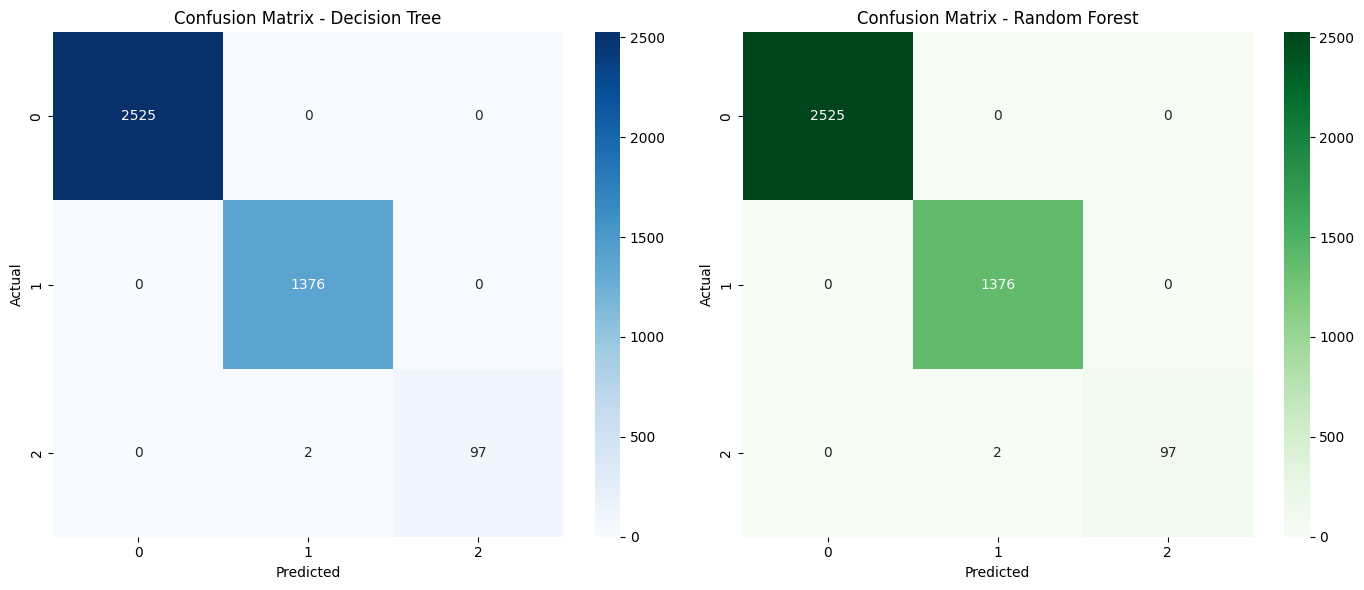

In [42]:
# Fungsi untuk plot confusion matrix dalam subplot
def plot_confusion_matrices_side_by_side(y_true, y_pred1, y_pred2, title1, title2):
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true), ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {title1}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true), ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {title2}')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan hasil model
plot_confusion_matrices_side_by_side(y_test, y_pred_dt, y_pred_rf, 'Decision Tree', 'Random Forest')

**Gambaran Umum Performa Model Decision Tree VS Random Forest:**
1. Kedua model menunjukkan hasil hampir sempurna dengan akurasi 100%
2. Semua metrik (precision/recall/F1) bernilai ≥ 0.98 untuk semua cluster

**Perbedaan utama :**

Cluster Mayoritas (0 & 1) :
1. Kedua model sempurna (precision/recall/F1 = 1.00)
2. Tidak ada kesalahan prediksi

Cluster minoritas (2):

1. Decision tree recall : 0.98 salah prediksi 2 instance
2. Random forest recall : 0.97 salah prediksi 3 instance

**Analisis berdasarkan classification report :**


**Interpretasi :**

1. Decision Tree sedikit lebih baik dalam mengenali cluster minoritas (recall 98% vs 97%).
2. Random Forest menunjukkan konsistensi yang diharapkan dari ensemble method.
3. Perbedaan sangat kecil (hanya 1 instance berbeda)









## **c. Tuning Model Klasifikasi (Optional)**

Menggunakan GridSearchSV untuk mencari kombinasi hyperparameter terbaik antara kedua model klasifikasi yang dibangun.

In [43]:
# Parameter grid untuk Decision Tree
dt_params = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

In [44]:
# Grid Search untuk Decision Tree
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='f1_macro', n_jobs=-1)
dt_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         TargetEncoder(),
                                                                         ['Customer_Type'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [45]:
# Model terbaik setelah tuning
best_dt = dt_grid.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
print("Decision Tree Tuned Performance:")
print(classification_report(y_test, y_pred_dt_tuned))
print("\nBest Parameters:", dt_grid.best_params_)

Decision Tree Tuned Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      1376
           2       0.99      0.98      0.98        99

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


In [46]:
# Parameter grid untuk Random Forest
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

In [47]:
# Grid Search untuk Random Forest
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         TargetEncoder(),
                                                                         ['Customer_Type'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [48]:
# Model terbaik setelah tuning
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("Random Forest Tuned Performance:")
print(classification_report(y_test, y_pred_rf_tuned))
print("\nBest Parameters:", rf_grid.best_params_)

Random Forest Tuned Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      1376
           2       1.00      0.97      0.98        99

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000


Best Parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [49]:
# Mengumpulkan hasil evaluasi lengkap
models = {
    'Decision Tree': y_pred_dt,
    'Decision Tree Tuned': y_pred_dt_tuned,
    'Random Forest': y_pred_rf,
    'Random Forest Tuned': y_pred_rf_tuned
}

detailed_results = []
for name, preds in models.items():
    # Menghitung semua metrik yang dibutuhkan
    precision_class2 = precision_score(y_test, preds, labels=[2], average='micro')
    recall_class2 = recall_score(y_test, preds, labels=[2], average='micro')
    f1_class2 = f1_score(y_test, preds, labels=[2], average='micro')

    detailed_results.append({
        'Model': name,
        'Accuracy': np.mean(preds == y_test),
        'Precision (Class 2)': precision_class2,
        'Recall (Class 2)': recall_class2,
        'F1-Score (Class 2)': f1_class2,
        'F1-Score (Macro)': f1_score(y_test, preds, average='macro'),
        'F1-Score (Weighted)': f1_score(y_test, preds, average='weighted')
    })

# Membuat DataFrame dengan urutan kustom
custom_order = [
    'Decision Tree',
    'Decision Tree Tuned',
    'Random Forest',
    'Random Forest Tuned'
]

results_df = pd.DataFrame(detailed_results)
results_df['Model'] = pd.Categorical(
    results_df['Model'],
    categories=custom_order,
    ordered=True
)

# Format tampilan angka desimal
pd.options.display.float_format = '{:.5f}'.format

print("\nPerbandingan Performa Model Lengkap:")
display(results_df.sort_values('Model'))


Perbandingan Performa Model Lengkap:


,Model,Accuracy,Precision (Class 2),Recall (Class 2),F1-Score (Class 2),F1-Score (Macro),F1-Score (Weighted)
0,Decision Tree,0.99950,1.00000,0.97980,0.98980,0.99636,0.99950
1,Decision Tree Tuned,0.99925,0.98980,0.97980,0.98477,0.99456,0.99925
2,Random Forest,0.99950,1.00000,0.97980,0.98980,0.99636,0.99950
3,Random Forest Tuned,0.99925,1.00000,0.96970,0.98462,0.99451,0.99924


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Interpretasi model klasifikasi Decision Tree vs Random Forest**

Decision Tree (Base)
1. Akurasi tertinggi (99.95%)
2. F1-Score Class 2 terbaik (98.98%) dengan recall lebih tinggi (97.98% vs 96.97% RF).
3. Precision sempurna (100%) untuk semua model.

Random Forest
1. Performa sedikit di bawah Decision Tree (akurasi 99.925%).
2. Tuning memperbaiki recall Class 2 (96.97% → 97.98%), tetapi precision turun (100% → 98.98%).

Tuning Tidak Signifikan
1. Decision Tree: Tuning justru menurunkan performa.
2. Random Forest: Perbaikan minimal setelah tuning.

**Kesimpulan Final :**
Decision Tree base adalah pilihan terbaik untuk kasus ini.

Tuning kurang bermanfaat:
1. Untuk Decision Tree: justru menurunkan performa.
2. Untuk Random Forest: perbaikan minimal.
3. Evaluasi tambahan diperlukan untuk memverifikasi keandalan model (akurasi >99.9% adalah indikasi model mengalami overfitting).